**1. Import Libraries**

Essential libraries like caer for image preprocessing, canaro for deep learning utilities, and tensorflow.keras for building the model are imported.

**2. Define Image Size and Channels**

The target image size is set to 80x80 pixels, and the images are converted to grayscale (single channel).

**3. Load Dataset and Create Character Dictionary**

The dataset containing images of "The Simpsons" characters is loaded from the directory. A dictionary is created that counts the number of images available for each character.

**4. Select Top 10 Characters**

The top 10 characters with the most images are selected for training the model. This limits the classification task to these 10 characters.

**5. Preprocess Data**

The images are preprocessed by resizing them to the specified dimensions, converting them to grayscale, and shuffling the dataset for randomization.

**6. Separate Features and Labels**

The dataset is split into two parts: image data (features) and corresponding labels. Features are the image pixel data, while labels are the character classes.

**7. Normalize Data and Encode Labels**
The image data is normalized to a range of 0 to 1 to improve model performance, and the labels are converted to a one-hot encoded format, making it suitable for multi-class classification.

**8. Split Data into Training and Validation Sets**

The dataset is split into training (80%) and validation (20%) sets. This ensures that the model is evaluated on unseen data during training.

**9. Create Image Data Generator**
An image data generator is used to augment the dataset by introducing slight variations (such as rotations or shifts) during training, helping to improve the model's generalization ability.

**10. Build the CNN Model**

A Convolutional Neural Network (CNN) is constructed with multiple layers:
Convolutional layers for feature extraction.
Max pooling layers to reduce dimensionality.
Dropout layers to prevent overfitting.
A fully connected (dense) layer for classification.
A final softmax layer for multi-class output.

**11. Compile the Model**

The model is compiled using an optimizer (SGD) to update weights during training. The binary cross-entropy loss function is used since it's a multi-class classification problem, and accuracy is chosen as the metric for evaluation.

**12. Train the Model**
The model is trained for 10 epochs, where it learns from the training data. After each epoch, the model is evaluated on the validation set to check how well it generalizes to unseen data.

**13. Test the Model**
    
A test image is loaded, preprocessed, and passed through the trained model. The model predicts the character from the image by selecting the class with the highest probability.

In [1]:
!pip install caer canaro

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 10.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 82.6 MB/s eta 0:00:00:00:010:01


In [2]:
import os
import caer
import canaro
import cv2 as cv 
import  gc

In [3]:
IMG_SIZE = (80,80)
channels = 1
char_path = r'/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset'

In [4]:
# Creating a character dictionary, sorting it in descending order
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))

In [5]:
char_dict

{'rainier_wolfcastle': 45,
 'maggie_simpson': 128,
 'krusty_the_clown': 1206,
 'waylon_smithers': 181,
 'professor_john_frink': 65,
 'fat_tony': 27,
 'ralph_wiggum': 89,
 'otto_mann': 32,
 'martin_prince': 71,
 'barney_gumble': 106,
 'ned_flanders': 1454,
 'patty_bouvier': 72,
 'sideshow_mel': 40,
 'marge_simpson': 1291,
 'abraham_grampa_simpson': 913,
 'selma_bouvier': 103,
 'mayor_quimby': 246,
 'disco_stu': 8,
 'lionel_hutz': 3,
 'simpsons_dataset': 42,
 'troy_mcclure': 8,
 'agnes_skinner': 42,
 'groundskeeper_willie': 121,
 'kent_brockman': 498,
 'charles_montgomery_burns': 1193,
 'carl_carlson': 98,
 'chief_wiggum': 986,
 'apu_nahasapeemapetilon': 623,
 'bart_simpson': 1342,
 'edna_krabappel': 457,
 'gil': 27,
 'comic_book_guy': 469,
 'principal_skinner': 1194,
 'cletus_spuckler': 47,
 'milhouse_van_houten': 1079,
 'snake_jailbird': 55,
 'nelson_muntz': 358,
 'lisa_simpson': 1354,
 'lenny_leonard': 310,
 'moe_szyslak': 1452,
 'miss_hoover': 17,
 'homer_simpson': 2246,
 'sideshow_b

In [6]:
des_sort_dict = caer.sort_dict(char_dict , descending=True)

In [7]:
des_sort_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [8]:
#  Getting the first 10 categories with the most number of images
characters = []
count = 0
for i in des_sort_dict:
    characters.append(i[0])
    count += 1
    if count >= 10:
        break
        
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [9]:
# Create the training data

train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 2.6397721767425537s
[INFO] At 1000 files
[INFO] 1454 files found in 0.8590786457061768s
[INFO] At 1000 files
[INFO] 1452 files found in 0.7744691371917725s
[INFO] At 1000 files
[INFO] 1354 files found in 0.6077122688293457s
[INFO] At 1000 files
[INFO] 1342 files found in 0.5510625839233398s
[INFO] At 1000 files
[INFO] 1291 files found in 0.40529584884643555s
[INFO] At 1000 files
[INFO] 1206 files found in 0.16599297523498535s
[INFO] At 1000 files
[INFO] 1194 files found in 0.15597128868103027s
[INFO] At 1000 files
[INFO] 1193 files found in 0.13286685943603516s
[INFO] At 1000 files
[INFO] 1079 files found in 0.005356788635253906s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 2m 45s


char_path: The directory path where the images are stored. It should be the root directory containing subfolders (one per class or category).

characters: A list of class names. These are the categories or labels you want to classify. Each subfolder in char_path should correspond to a label.

channels: Defines the color channel format for the images. For example:

channels=1 for grayscale images.
channels=3 for RGB color images.
IMG_SIZE: The size to which all images will be resized (to standardize input sizes for deep learning models). This is usually a tuple like (224, 224).

isShuffle=True: This shuffles the dataset so that the order of the images is randomized. It is useful to prevent the model from learning any bias based on the order of the data.

In [10]:
train

array([[tensor([[54, 54, 54,  ..., 55, 55, 55],
                [49, 49, 49,  ..., 60, 60, 60],
                [60, 60, 60,  ..., 75, 75, 75],
                ...,
                [39, 39, 39,  ..., 79, 66, 13],
                [39, 39, 39,  ..., 79, 73, 14],
                [39, 39, 39,  ..., 79, 76, 15]], dtype=uint8), 7],
       [tensor([[49, 49, 42,  ..., 50, 57, 58],
                [49, 54, 54,  ..., 50, 30, 29],
                [49, 54, 55,  ..., 51, 39, 61],
                ...,
                [108, 108, 108,  ..., 108, 108, 108],
                [108, 108, 108,  ..., 108, 108, 108],
                [108, 108, 103,  ..., 108, 108, 108]], dtype=uint8), 0],
       [tensor([[128, 128, 128,  ..., 128, 128, 128],
                [128, 128, 128,  ..., 128, 128, 128],
                [128, 128, 128,  ..., 128, 128, 128],
                ...,
                [69, 69, 84,  ..., 128, 128, 128],
                [50, 50, 84,  ..., 128, 128, 128],
                [85, 84, 84,  ..., 128, 1

In [11]:
train[0][0]

tensor([[54, 54, 54,  ..., 55, 55, 55],
        [49, 49, 49,  ..., 60, 60, 60],
        [60, 60, 60,  ..., 75, 75, 75],
        ...,
        [39, 39, 39,  ..., 79, 66, 13],
        [39, 39, 39,  ..., 79, 73, 14],
        [39, 39, 39,  ..., 79, 76, 15]], dtype=uint8)

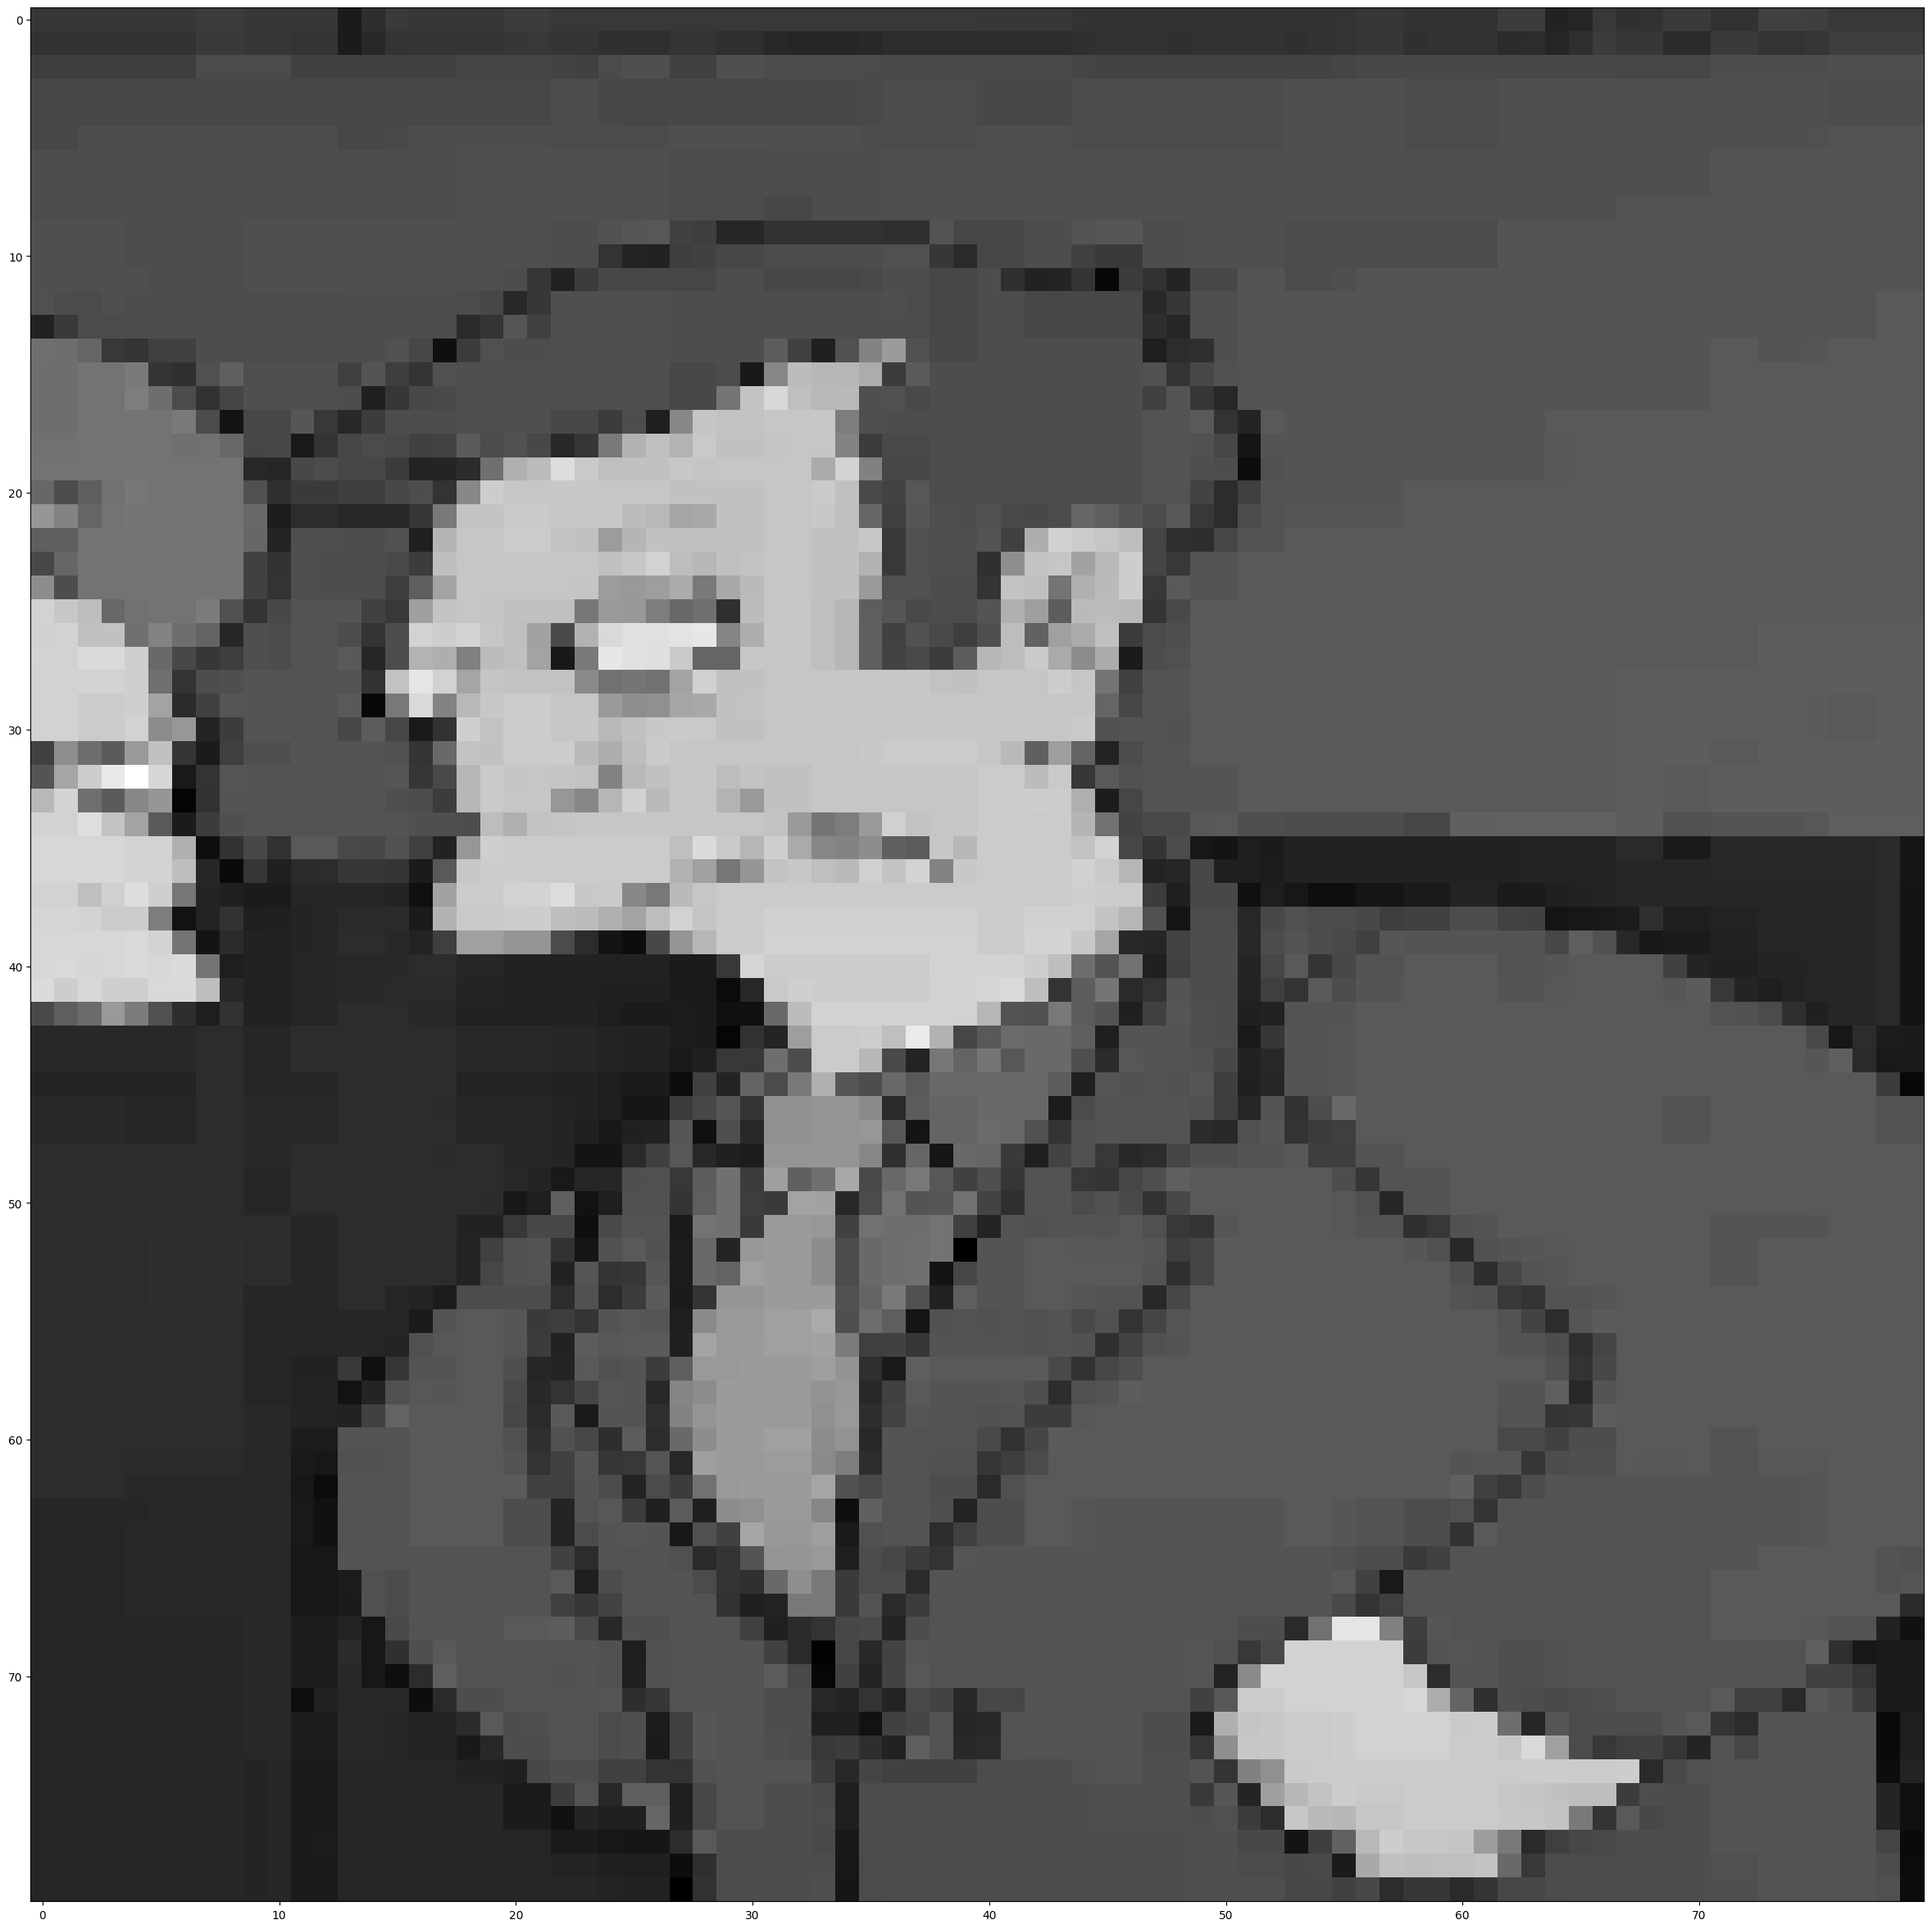

In [12]:
# Visualizing the data (OpenCV doesn't display well in Jupyter notebooks)
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap='gray')
plt.show()

In [13]:
# Separating the array and corresponding labels
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

In [14]:
from tensorflow.keras.utils import to_categorical

# Normalize the featureSet ==> (0,1)
featureSet = caer.normalize(featureSet)
# Converting numerical labels to binary class vectors
labels = to_categorical(labels, len(characters))

In [15]:
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio=.2)

In [16]:
del train
del featureSet
del labels 
gc.collect()

0

In [17]:
# Useful variables when training
BATCH_SIZE = 32
EPOCHS = 10

In [18]:
# Image data generator (introduces randomness in network ==> better accuracy)
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

During each epoch, the ImageDataGenerator will create slightly modified versions of your training images (e.g., rotating, zooming) in real time.
These augmented images are used to train the model, making it more robust to variations and improving its ability to generalize to unseen data.

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

In [20]:
output_dim=10
w, h = IMG_SIZE[:2]
model =  Sequential()

The images are processed to match the number of channels (1 for grayscale or 3 for RGB).

In [21]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(w, h, channels)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


In [23]:
model.add(Conv2D(256, (3, 3), padding='same', activation='relu')) 
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


In [37]:
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))


In [38]:
model.add(Dense(output_dim, activation='softmax'))


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 80, 80, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 78, 78, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 39, 39, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 37, 37, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 18, 18, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8, 8, 10)       │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,471,988 (5.62 MB)

 Trainable params: 1,471,988 (5.62 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
#Stochastic Gradient Descent (SGD
from tensorflow.keras.optimizers import SGD


In [41]:
# Define the optimizer with parameters
optimizer = SGD(
    learning_rate=0.001,  # Small steps for careful learning
    decay=1e-7,           # Gradually reduce step size over time
    momentum=0.9,         # Keep moving in the right direction
    nesterov=True         # Look ahead for better decisions
)

/opt/conda/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [42]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [43]:

from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

canaro.lr_schedule is a function (not defined in your snippet) that should define how the learning rate changes over epochs. This can help improve training by adapting the learning rate as the model learns.

In [44]:
training = model.fit(train_gen,
                    steps_per_epoch=len(x_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks = callbacks_list)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1728736767.378013     114 service.cc:145] XLA service 0x7f4d78008f10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728736767.378094     114 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728736767.378100     114 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  5/345 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.1206 - loss: 0.7060 

I0000 00:00:1728736781.289780     114 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


345/345 ━━━━━━━━━━━━━━━━━━━━ 43s 77ms/step - accuracy: 0.1341 - loss: 0.4154 - val_accuracy: 0.1679 - val_loss: 0.3221 - learning_rate: 0.0100
Epoch 2/10
  1/345 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.2500 - loss: 0.3202

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2500 - loss: 0.3202 - val_accuracy: 0.1679 - val_loss: 0.3221 - learning_rate: 0.0100
Epoch 3/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.1592 - loss: 0.3236 - val_accuracy: 0.1679 - val_loss: 0.3221 - learning_rate: 0.0100
Epoch 4/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1562 - loss: 0.3249 - val_accuracy: 0.1679 - val_loss: 0.3221 - learning_rate: 0.0100
Epoch 5/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.1631 - loss: 0.3233 - val_accuracy: 0.1679 - val_loss: 0.3221 - learning_rate: 0.0100
Epoch 6/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1250 - loss: 0.3259 - val_accuracy: 0.1679 - val_loss: 0.3221 - learning_rate: 0.0100
Epoch 7/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.1586 - loss: 0.3237 - val_accuracy: 0.1679 - val_loss: 0.3222 - learning_rate: 0.0100
Epoch 8/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2500 - loss: 0.3183 - val_a

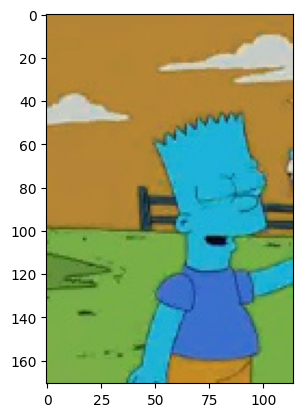

In [45]:
test_path = r'/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/bart_simpson_28.jpg'

img = cv.imread(test_path)

plt.imshow(img)
plt.show()

In [46]:
def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, IMG_SIZE)
    image = caer.reshape(image, IMG_SIZE, 1)
    return image

In [47]:
predictions = model.predict(prepare(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step


In [49]:
predictions[0]

array([0.20682666, 0.09616893, 0.11986991, 0.12002807, 0.08908508,
       0.07529175, 0.06409866, 0.08183459, 0.07591034, 0.07088597],
      dtype=float32)

In [51]:
import numpy as np
# Getting class with the highest probability
print(characters[np.argmax(predictions[0])])

homer_simpson
